

<div>
  <img src="imagens/logo_jr.png" width="100" height="75" style="float:right">
  <h1>Código para análise da base de dados</h1>
    <p>Autores: Luigi Orlandi, Pedro Mahfuz, Theo Decourt</p>
</div>

In [1]:
# Importando Bibliotecas
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Abrindo a base de dados


In [2]:
# Leitura do arquivo .xlsx
filename = pathlib.Path.cwd() / 'Base_MindMiners.xlsx'
db = pd.read_excel('Base_MindMiners.xlsx')

# Segunda tabela com respostas
df = pd.read_excel('Base_MindMiners.xlsx', sheet_name='Pesquisa-Respostas')

# Limpeza da base de dados

### Removendo colunas vazias e normalizando indexes

In [3]:
# Remover as colunas com índices 'Unnamed'
df = df.drop(columns=[coluna for coluna in df.columns if coluna.startswith('Unnamed:')])

In [4]:
# Usando a função split para remover espaços nos indexes das colunas
df.columns = df.columns.str.strip()

In [5]:
# # Usando a função str.replace para remover "." dos indexes das colunas
df.columns = df.columns.str.replace(".", "")''

C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19616\2669726975.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


### Removendo conteudo indesejado das colunas


In [6]:
# Lista com todas as colunas
nomes = list(df)

In [7]:
# Primeria coluna
df.loc[~df.loc[:, nomes[0]].isin(range(1,6)), nomes[0]] = None

In [8]:
# Seguna coluna
df.loc[~df.loc[:, nomes[1]].isin(range(1,9)), nomes[1]] = None

In [9]:
# Coluna 3 a 58
for coluna in range(2, 58):
    df.loc[~df.loc[:, nomes[coluna]].isin(range(1,8)), nomes[coluna]] = None

In [10]:
# Coluna Qesc
df.loc[~df.loc[:, nomes[58]].isin(range(1,7)), nomes[58]] = None

In [11]:
# Coluna Qnat
df.loc[~df.loc[:, nomes[60]].isin(range(0,6)), nomes[60]] = None

In [12]:
# Coluna Qcama
df.loc[~df.loc[:, nomes[62]].isin(range(0,5)), nomes[62]] = None

In [13]:
# Coluna Qche
lista_quinta_feira = ["Quinta-Feira", "Quinta Feira", "quinta-Feira", "quintaFeira"]
df.loc[df.loc[:, nomes[64]].isin(lista_quinta_feira), nomes[64]] = 'Quinta-Feira'

# Primeira análise dos dados

### Preparando o banco de dados para a análise exploratória

In [14]:
# Criando uma copia do banco de dados original para fazer a análise exploratória
df_ae = df.copy()

In [15]:
# Frequência de viagem
df_ae['P1'] = df_ae['P1'].astype('category')
df_ae['P1'].cat.categories = ['1 a 3', '4 a 6', '7 a 10', '10+', 'Não Viaja']

# Faixa etaria
df_ae['Qid'] = df_ae['Qid'].astype('category')
df_ae['Qid'].cat.categories = ['18-', '18 a 24', '25 a 34', '35 a 44', '45 a 54', '55+']

# Escolaridade
df_ae['Qesc'] = df_ae['Qesc'].astype(float)

# Numero de filhos
df_ae['Qnat'] = df_ae['Qnat'].astype(float)

# Regiao
df_ae['Qreg'] = df_ae['Qreg'].astype('category')
df_ae['Qreg'].cat.categories = ['Sudeste', 'Sul', 'Centro Oeste', 'Nordeste', 'Norte']

# Gênero
df_ae['Qgen'] = df_ae['Qgen'].astype('category')
df_ae['Qgen'].cat.categories = ['Masculino', 'Feminino']

# Número de filhos
df_ae['Qnat'] = df_ae['Qnat'].astype(float)

# Motivo viagem
df_ae['P2'] = df_ae['P2'].astype('category')
df_ae['P2'].cat.categories = ['Visitar amigos', 'Visitar familia', 'Lazer', 'Pesquisa Ciêntifica', 'Trabalho', 'Viagem gastronomica', 'Desconectar'] 


In [16]:
# Separamos as colunas que acreditamos serem as mais importantes para definir o público-alvo¶
# Exclamações indicam as variáveis que consideramos mais importantes

freq_de_viagem = df_ae['P1'] # qualitativa   !!!!!
faixa_etaria = df_ae['Qid'] # qualitativa 
nivel_escolaridade = df_ae['Qesc'] # qualitativa
motivo_viagem = df_ae['P2'] # qualitativa    !!!!!
classe = df_ae['Qclasse'] # qualitativa  !!!!!
genero = df_ae['Qgen'] # qualitativa
estado_civil = df_ae['Qciv'] # qualitativa
filhos = df_ae['Qnat'] # quantitativa
estadia_media = df_ae['Qest'] # quantitativa   !!!!!
regiao = df_ae['Qreg'] # qualitativa

#quantitativa e qualitativa --> histograma e boxplot
#qualitativa e qualitativa --> tabela cruzada e grafico de barra
#quantitativa e quantitativa --> gráfico de dispersão

# Análise exploratória
<p> Nossa ideia inicial é ver qual é o "tipo de pessoa" que viaja com mais frequência. Além disso, fizemos algumas outras análises para obter informações importantes a respeito do banco de dados. Assim seria possível entender melhor os dados antes de iniciar o processo de clusterização</p>

In [17]:
# Definindo as cores
cores = ['lightcoral', 'yellow', 'darkgoldenrod', 'limegreen', 'dodgerblue', 'purple', 'red']
cores2 = [ 'pink', 'blue', 'yellow']
cores3 = ['orange']

## Gráfico de barras de frequência de viagem por faixa etária

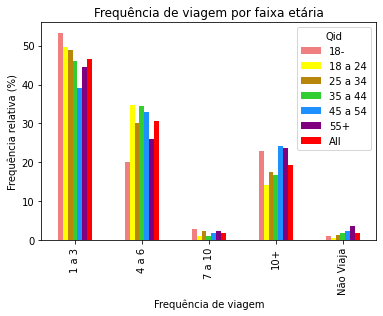

In [18]:
freq_x_idade = pd.crosstab(freq_de_viagem, faixa_etaria, normalize = 'columns', margins = True).round(3)*100

freq_x_idade.plot.bar(color = cores)
plt.title('Frequência de viagem por faixa etária')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
plt.show()

## Boxplot da frequência de viagem pela estadia média

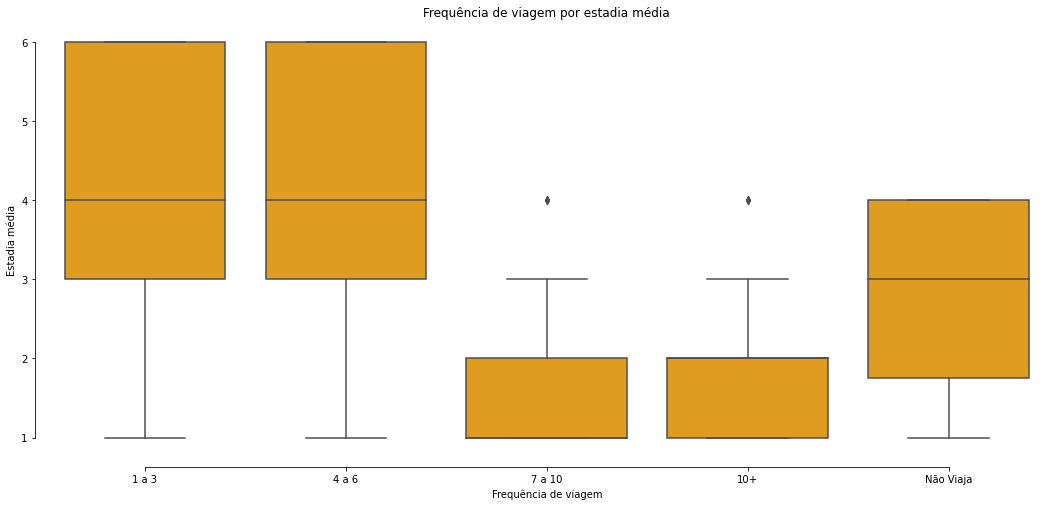

In [19]:
plt.figure(figsize=(18,8))

sns.boxplot(x=freq_de_viagem,                                              # Eixo X receberá os grupos.
            y=estadia_media,                                                   # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=cores3,                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
                                                                             # no eixo X.
            data=df_ae)                                                       # Dados

plt.title('Frequência de viagem por estadia média')
plt.xlabel('Frequência de viagem')
plt.ylabel('Estadia média')
sns.despine(offset=10, trim=True)

Esse boxplot mostra que pessoas que viajam menos vezes por ano tem uma estadia média maior do que pessoas que viajam mais vezes por ano. Com isso, já é possível sondar doios tipos de personas.

## Gráfico de barras de frequência de viagem por região

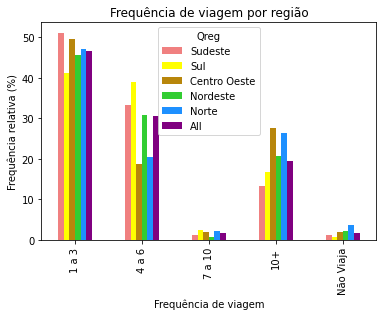

In [20]:
freq_x_regiao = pd.crosstab(freq_de_viagem, regiao, normalize = 'columns', margins = True).round(3)*100

freq_x_regiao.plot.bar(color = cores)
plt.title('Frequência de viagem por região')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
plt.show()

## Gráfico de barras de frequência de viagem por gênero

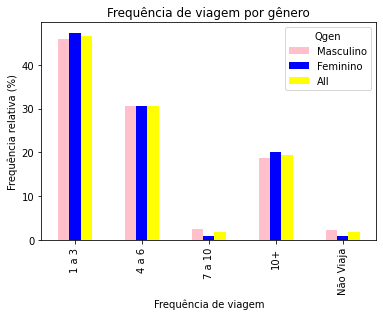

In [21]:
freq_x_gen = pd.crosstab(freq_de_viagem, genero, normalize = 'columns', margins = True).round(3)*100

freq_x_gen.plot.bar(color = cores2)
plt.title('Frequência de viagem por gênero')
plt.ylabel('Frequência relativa (%)') #Frequência absoluta já que o número de homens e mulheres é muito parecido
plt.xlabel('Frequência de viagem')
plt.show()

Nesse gráfico de barras é possível perceber o genêro não é muito significante ao analisar a frequência de viagem já que em todos os intervalos de frequência os gêneros estão distribuidos quase igualmente.

# Gráfico de barras de frequência de viagem por classe

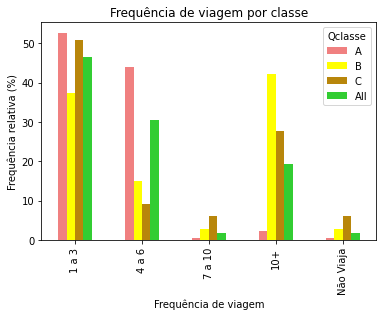

In [23]:
freq_x_classe = pd.crosstab(freq_de_viagem, classe, normalize = 'columns', margins = True).round(3)*100

freq_x_classe.plot.bar(color = cores)
plt.title('Frequência de viagem por classe')
plt.ylabel('Frequência relativa (%)') #Frequência absoluta já que o número de homens e mulheres é muito parecido
plt.xlabel('Frequência de viagem')
plt.show()

Nesse gráfico, o que mais chama a atenção é a alta frequência de viagem da classe B no intervalo de 10+. Enquanto isso, a classe A se destaca no intervalo de 4 a 6.

## Boxplot da frequência de viagem pelo numero de filhos

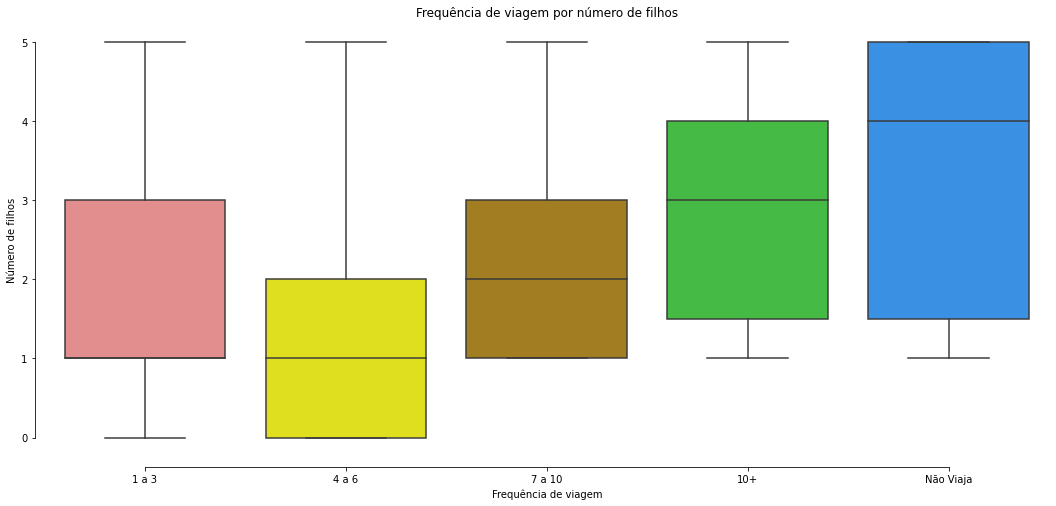

In [24]:
plt.figure(figsize=(18,8))

sns.boxplot(x=freq_de_viagem,                                              # Eixo X receberá os grupos.
            y=filhos,                                                   # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=cores,                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
                                                                             # no eixo X.
            data=df_ae)                                                       # Dados

plt.title('Frequência de viagem por número de filhos')
plt.xlabel('Frequência de viagem')
plt.ylabel('Número de filhos')
sns.despine(offset=10, trim=True)

#### Para as seguintes análises decidimos criar um dataframe novo apenas com as famílias, ou seja, com as pessoas casadas que tem pelo menos um filho, e outro dataframe com as pessoas que não são casadas

In [25]:
df_familia = df_ae.copy()

# Filtrando apenas as familias
casados = df_ae['Qciv'] == 'Casado'
filhos = df_ae['Qnat'].isin(range(1,6))

# Criando um banco de dados apenas com as familias
df_familia = df_familia.loc[casados & filhos, :]


In [26]:
df_nao_familia = df_ae.copy()

# # Filtrando apenas as "não familias"
nao_casados = df_ae['Qciv'] != 'Casado'

# Criando um banco de dados apenas com as "não familias"
df_nao_familia = df_ae.loc[nao_casados, :]


In [27]:
# Tempo de estadia, em porcentagem, de uma familia e de uma "não familia"

df_familia['Estadia_familia'] = df_familia['Qest'] #essa mudanca de nome esta causando o erro
estadia_familia = (df_familia['Estadia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']
estadia_nao_familia = (df_nao_familia['Estadia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

Qest_familia_x_naofamilia = pd.concat([estadia_familia, estadia_nao_familia], axis=1)
print(Qest_familia_x_naofamilia)

     Estadia_familia  Estadia_nao_familia
4.0            39.87                12.30
6.0             5.70                41.41
1.0             8.86                16.80
3.0            40.51                11.52
2.0             5.06                17.97


C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19616\1043923398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']


In [28]:
# Frequência de viagem, em porcentagem, de uma familia e de uma "não familia"

df_familia['Frequencia_familia'] = df_familia['P1']
frequencia_familia = (df_familia['Frequencia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']
frequencia_nao_familia = (df_nao_familia['Frequencia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

freq_familia_x_naofamilia = pd.concat([frequencia_familia, frequencia_nao_familia], axis=1)
print(freq_familia_x_naofamilia)

           Frequencia_familia  Frequencia_nao_familia
1 a 3                   56.13                   41.43
4 a 6                   29.03                   24.29
7 a 10                   1.61                    2.04
10+                     11.61                   30.20
Não Viaja                1.61                    2.04


C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_19616\3234914096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']


Aqui é possível observar que, em geral, as famílias viajam menos vezes que as não famílias

#### Por último fizemos uma análise do motivo da viagem 

In [29]:
# Motivo da viagem em porcentagem

df_ae['Motivo_viagem'] = df_ae['P2']
(df_ae['Motivo_viagem'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

,Motivo_viagem
Visitar amigos,2.62
Visitar familia,18.35
Lazer,41.94
Pesquisa Ciêntifica,1.41
Trabalho,12.40
Viagem gastronomica,1.21
Desconectar,22.08


Aqui, observamos que os prícipais motivos estavam relacionados com lazer, desconectar e visitar familia. Esses, estão relacionados com passatempo e entreterimento.

# Clusterização

In [30]:
# Trocando classes de "A, B, C" para "1, 2, 3"
df['Qclasse'] = df['Qclasse'].replace('A', 1)
df['Qclasse'] = df['Qclasse'].replace('B', 2)
df['Qclasse'] = df['Qclasse'].replace('C', 3)

df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs
0,2.0,7,7.0,5.0,4,2,6,7.0,5,1.0,...,Viuvo,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,2.0,Dados para Marketing
1,3.0,2,2.0,6.0,4,2,5,1.0,3,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,2.0,NaN
2,1.0,7,7.0,5.0,4,5,6,6.0,5,2.0,...,Viuvo,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,2.0,Dados para Hotel
3,1.0,3,4.0,4.0,6,6,1,7.0,6,6.0,...,Casado,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,2.0,Marketing
4,2.0,7,6.0,7.0,3,3,7,6.0,5,2.0,...,Casado,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,1.0,Dados para Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3,7.0,6.0,6,6,2,4.0,7,5.0,...,Solteiro,2.0,6.0,Domingo,5.0,5.0,2.0,1.0,1.0,Pesquisa Hotel
1264,1.0,3,7.0,7.0,5,3,6,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,5.0,4.0,2.0,2.0,1.0,Pesquisa
1265,2.0,7,6.0,6.0,4,5,6,6.0,5,1.0,...,Casado,2.0,3.0,Quinta-Feira,4.0,5.0,2.0,1.0,1.0,Dados para Hotel
1266,2.0,3,5.0,5.0,6,5,7,6.0,5,2.0,...,Casado,1.0,3.0,Quinta-Feira,4.0,4.0,2.0,3.0,1.0,Coleta de dados


In [31]:
# Na coluna de frequência de vigens alteramos para 0 o voto de quem não viaja
df['P1'] = df['P1'].replace(5, 0)

In [32]:
# Criando uma copia do df para fazer a clusterização somente com as colunas escolhidas
X = df.copy()
X = X.loc[:, ['P1', 'P2', 'Qest', 'Qclasse']]
X

,P1,P2,Qest,Qclasse
0,2.0,7,4.0,2.0
1,3.0,2,1.0,2.0
2,1.0,7,3.0,2.0
3,1.0,3,6.0,2.0
4,2.0,7,4.0,1.0
...,...,...,...,...
1263,2.0,3,6.0,1.0
1264,1.0,3,3.0,1.0
1265,2.0,7,3.0,1.0
1266,2.0,3,3.0,1.0


In [33]:
# Removendo células Nan do df X
X = X.replace(r'^\s*$', np.nan, regex=True)
X = X.dropna()

In [34]:
# Criando um objeto KMeans com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Treinando o modelo e obtendo as atribuições de cluster
labels = kmeans.fit_predict(X)

# Obter as coordenadas dos centróides dos clusters
centroids = kmeans.cluster_centers_

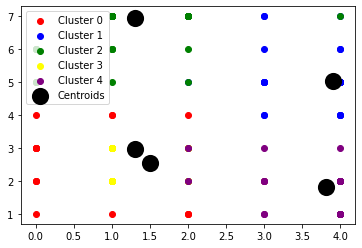

In [35]:
# Separando os dados por cluster
cluster0 = X.iloc[labels == 0, :]
cluster1 = X.iloc[labels == 1, :]
cluster2 = X.iloc[labels == 2, :]
cluster3 = X.iloc[labels == 3, :]
cluster4 = X.iloc[labels == 4, :]


# Criando uma lista com todos os clusters
clusters = [cluster0, cluster1, cluster2, cluster3, cluster4]

# Plotando os clusters em gráficos diferentes
plt.scatter(cluster0.iloc[:, 0], cluster0.iloc[:, 1], color='red', label='Cluster 0')
plt.scatter(cluster1.iloc[:, 0], cluster1.iloc[:, 1], color='blue', label='Cluster 1')
plt.scatter(cluster2.iloc[:, 0], cluster2.iloc[:, 1], color='green', label='Cluster 2')
plt.scatter(cluster3.iloc[:, 0], cluster3.iloc[:, 1], color='yellow', label='Cluster 3')
plt.scatter(cluster4.iloc[:, 0], cluster4.iloc[:, 1], color='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, linewidths=3, color='black', zorder=10, label='Centroids')
plt.legend()
plt.show()

## Decobrindo o valor "ideal" de centroides e quão satisfatório foi a clusterização

In [36]:
# Agora vamos ver quão satisfatório e bem definidos estão os clusteres
from sklearn.metrics import silhouette_score

# silhouette_score() retorna o valor do coeficiente de silhueta
silhouette_avg = silhouette_score(X, labels)
print("Coeficiente de Silhueta médio:", silhouette_avg)

Coeficiente de Silhueta médio: 0.6082346920666715


C:\Users\Pedro Mahfuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


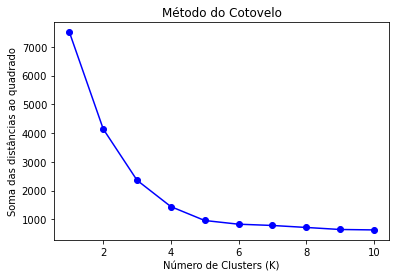

In [37]:
sum_of_squared_distances = []
# Executar o K-means para diferentes valores de K
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotar a soma das distâncias ao quadrado em função do número de clusters
plt.plot(k_values, sum_of_squared_distances, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das distâncias ao quadrado')
plt.title('Método do Cotovelo')
plt.show()

Considerando o Método do Cotovelo e coeficiente de silhueta concluimos que a melhor quantidade de clusters é 5

# Adicionando o resultado da clusterização no dataframe

In [38]:
# Removendo os valores Nan das colunas 'P1','P2','Qest','Qclasse' para poder adicionar o labels no dataframe
df = df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(subset=['P1','P2','Qest','Qclasse'], inplace=True)

# Adicionando uma coluna de clusterização no banco de dados
df['cluster'] = labels
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs,cluster
0,2.0,7.0,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,1.0,4.0,Sábado,2.0,6.0,1.0,2.0,2.0,Dados para Marketing,2
1,3.0,2.0,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,2.0,NaN,4
2,1.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,1.0,3.0,Sábado,3.0,4.0,1.0,2.0,2.0,Dados para Hotel,2
3,1.0,3.0,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,2.0,Marketing,3
4,2.0,7.0,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,1.0,4.0,Quinta-Feira,6.0,2.0,1.0,2.0,1.0,Dados para Hotel,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3.0,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,2.0,6.0,Domingo,5.0,5.0,2.0,1.0,1.0,Pesquisa Hotel,3
1264,1.0,3.0,7.0,7.0,5.0,3.0,6.0,6.0,5.0,2.0,...,1.0,3.0,Quinta-Feira,5.0,4.0,2.0,2.0,1.0,Pesquisa,0
1265,2.0,7.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,2.0,3.0,Quinta-Feira,4.0,5.0,2.0,1.0,1.0,Dados para Hotel,2
1266,2.0,3.0,5.0,5.0,6.0,5.0,7.0,6.0,5.0,2.0,...,1.0,3.0,Quinta-Feira,4.0,4.0,2.0,3.0,1.0,Coleta de dados,0


# Analise da clusterização


In [39]:
# Frequência média de viagem de cada cluster
for i in range(5):
    print('Frequência de viajens média do cluster{}: {:.4}'.format(i, clusters[i]['P1'].mean()))

Frequência de viajens média do cluster0: 1.304
Frequência de viajens média do cluster1: 3.907
Frequência de viajens média do cluster2: 1.305
Frequência de viajens média do cluster3: 1.506
Frequência de viajens média do cluster4: 3.818


In [40]:
# Estadia média de cada cluster
for i in range(5):
    print('Estadia média do cluster{}: {:.4}'.format(i, clusters[i]['Qest'].mean()))

Estadia média do cluster0: 3.399
Estadia média do cluster1: 1.605
Estadia média do cluster2: 3.473
Estadia média do cluster3: 6.0
Estadia média do cluster4: 1.532


In [41]:
# Classe de cada cluster (Quanto mais perto de 1 --> Classe A e quanto mais perto de 3 --> classe C)
for i in range(5):
    print('Classe do cluster{}: {:.4}'.format(i, clusters[i]['Qclasse'].mean()))

Classe do cluster0: 1.497
Classe do cluster1: 2.062
Classe do cluster2: 1.382
Classe do cluster3: 1.238
Classe do cluster4: 1.974




Após analisar os resultados da clusterização encontramos duas possiblidades de investimento diferentes e destacaram-se os clusters 1, 3 e 4. Primeiramente, percebemos que os clusters 1 e 4 eram muito semelhantes considerando a frequência média, a estadia média e a classe social. Com esses clusters, identificamos uma primeira opção de público-alvo (público-alvo 1), o que viaja muitas vezes por ano, que tem uma estadia média relativamente baixa e que pertence a uma classe mais baixa. Já o cluster 3, se difere nesses três aspectos em relação aos clusters citados anteriormente, e define uma público-alvo (público-alvo 2), o que viaja poucas vezes no ano, tem uma estadia média alta e pertence a uma classe social alta.

**Para definir o público-alvo mais detalhadamente analisamos também o motivo de viagem dos clusters selecionados.**

In [42]:
# Motivo da viagem do cluster1
tab = cluster1['P2'].value_counts(sort=False)
tab.to_frame()

,P2
5.0,117
4.0,6
7.0,3
6.0,3


In [43]:
# Motivo da viagem do cluster4
tab = cluster4['P2'].value_counts(sort=False)
tab.to_frame()

,P2
2.0,56
1.0,17
3.0,4


O público-alvo 1, que tinham dois clusters muito parecidos, agora se diferenciam em relação ao motivo de viagem. Enquanto no cluster4 os principais motivos são: visitar família e visitar amigos, no cluster 1 o motivo que mais se destaca é viagem a trabalho.

In [44]:
# Motivo da viagem do cluster3
tab = cluster3['P2'].value_counts(sort=False)
tab.to_frame()

,P2
3.0,128
2.0,111


Já no cluster3, referente ao público-alvo 2, os motivos de viagem são: visitar a família e lazer.

Nesse cenário, visualizando diferentes opções de público-alvo, encontramos os seguintes:
- Público-alvo 1: Quem viaja muitas vezes ao longo do ano, não fica muito tempo no hotel em cada viagem, possui um menor poder aquisitivo e os pricipais motivos de viagem são: trabalho, visitar amigos e visitar a família
- Público-alvo 2: Quem viaja poucas vezes no ano, tem uma estadia média alta, possui maior poder aquisitivo e o motivo de viagem, grande parte das vezes, está relacionado com passatempo e lazer

<p>Abaixo, iremos analisar os tipos de hotel referentes a cada público-alvo para concluir qual tipo de hotel e qual é o público-alvo mais se adequa as necessidades de nosso cliente, Leonardo. </p>

# Analisando o tipo de hotel adequado para cada público-alvo

In [45]:
# Criando um dataframe novo apenas com as pessoas referentes a público-alvo 1
df_pa1 = df.copy()

clus1 = df_pa1['cluster'] == 1
clus4 = df_pa1['cluster'] == 4

df_pa1 = df_pa1.loc[clus1 | clus4, :]

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs,cluster
1,3.0,2.0,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,1.0,1.0,Quinta-Feira,2.0,6.0,1.0,5.0,2.0,NaN,4
12,4.0,5.0,3.0,6.0,2.0,1.0,1.0,5.0,1.0,2.0,...,3.0,2.0,Quinta-Feira,5.0,5.0,2.0,1.0,2.0,Pesquisa Hotel,1
17,4.0,5.0,4.0,7.0,3.0,2.0,2.0,6.0,2.0,2.0,...,3.0,1.0,Quarta-Feira,3.0,5.0,2.0,3.0,2.0,Análise de Dados,1
26,4.0,5.0,7.0,3.0,6.0,1.0,1.0,7.0,1.0,2.0,...,3.0,1.0,Quarta-Feira,3.0,6.0,2.0,3.0,2.0,Pesquisa Hotel,1
34,4.0,5.0,2.0,5.0,6.0,2.0,2.0,6.0,2.0,2.0,...,4.0,1.0,Quinta-Feira,1.0,2.0,2.0,3.0,2.0,Pesquisa Hotel,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,4.0,5.0,1.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,...,1.0,1.0,Quarta-Feira,4.0,2.0,1.0,2.0,2.0,Análise de Dados,1
1234,4.0,2.0,4.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,4.0,1.0,Quarta-Feira,1.0,5.0,1.0,5.0,2.0,Análise de Dados,4
1253,4.0,5.0,5.0,4.0,3.0,1.0,1.0,7.0,1.0,2.0,...,1.0,1.0,Quarta-Feira,6.0,2.0,2.0,4.0,2.0,Pesquisa,1
1255,4.0,2.0,2.0,6.0,1.0,2.0,2.0,5.0,2.0,2.0,...,4.0,2.0,Quarta-Feira,1.0,1.0,1.0,3.0,2.0,Pesquisa,4


In [46]:
# Criando um dataframe novo apenas com as pessoas referentes a público-alvo 2

df_pa2 = df.copy()

clus3 = df_pa2['cluster'] == 3

df_pa2 = df_pa2.loc[clus3, :]

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,Qs,cluster
3,1.0,3.0,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,1.0,6.0,Terça-Feira,3.0,1.0,2.0,2.0,2.0,Marketing,3
5,1.0,2.0,2.0,4.0,5.0,7.0,2.0,3.0,7.0,6.0,...,3.0,6.0,Terça-Feira,5.0,4.0,2.0,5.0,1.0,Pesquisa Hotel,3
7,1.0,3.0,2.0,1.0,1.0,7.0,2.0,2.0,6.0,5.0,...,2.0,6.0,Terça-Feira,1.0,2.0,2.0,2.0,2.0,Marketing,3
8,2.0,2.0,4.0,1.0,1.0,6.0,1.0,4.0,7.0,5.0,...,2.0,6.0,Terça-Feira,3.0,3.0,1.0,5.0,1.0,Dados para Hotel,3
16,1.0,2.0,2.0,3.0,1.0,6.0,1.0,5.0,7.0,6.0,...,0.0,6.0,Terça-Feira,6.0,5.0,2.0,5.0,1.0,Pesquisa,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1.0,2.0,3.0,7.0,7.0,6.0,1.0,4.0,6.0,7.0,...,4.0,6.0,Terça-Feira,2.0,5.0,2.0,2.0,1.0,Dados para Hotel,3
1251,1.0,3.0,3.0,2.0,4.0,7.0,1.0,4.0,6.0,5.0,...,0.0,6.0,Terça-Feira,4.0,2.0,1.0,4.0,2.0,Dados para Hotel,3
1256,2.0,2.0,1.0,2.0,1.0,7.0,1.0,4.0,7.0,6.0,...,1.0,6.0,Segunda-Feira,2.0,1.0,1.0,1.0,1.0,Pesquisa Hotel,3
1259,2.0,3.0,3.0,1.0,6.0,7.0,1.0,6.0,6.0,6.0,...,3.0,6.0,Terça-Feira,5.0,2.0,2.0,4.0,2.0,Dados para Hotel,3


**Agora vamos analisar a importância dos diferentes setores do hotel para cada público-alvo**

In [47]:
# Para o público-alvo 1 (em uma escala de 1 a 7) - foi utilizado a média para saber a importância do setor para determinado público-alvo

print('Público-alvo 1:')
print('Importância de ter uma boa infraestrutura: {:.3}'.format(df_pa1['P3'].mean()))
print('Importância de ter entreterimento: {:.3}'.format(df_pa1['P5'].mean()))
print('Importância de ter serviços de qualidade: {:.3}'.format(df_pa1['P31'].mean()))

Público-alvo 1:
Importância de ter uma boa infraestrutura: 3.91
Importância de ter entreterimento: 4.09
Importância de ter serviços de qualidade: 3.94


In [48]:
# Para o público-alvo 2

print('Público-alvo 2:')
print('Importância de ter uma boa infraestrutura: {:.3}'.format(df_pa2['P3'].mean()))
print('Importância de ter entreterimento: {:.3}'.format(df_pa2['P5'].mean()))
print('Importância de ter serviços de qualidade: {:.3}'.format(df_pa2['P31'].mean()))

Público-alvo 2:
Importância de ter uma boa infraestrutura: 3.86
Importância de ter entreterimento: 3.94
Importância de ter serviços de qualidade: 4.22


Ao analisarmos os resultados e as médias das perguntas mais genéricas que abrangem os setores de Infraestrutura, Entretenimento e Serviços, constatamos que não houve uma diferença significativa entre as preferências dos dois públicos-alvo. Embora o Cluster3, composto principalmente por viajantes de lazer de alta renda, e os Clusters1 e 4, que viajam a trabalho e têm menor poder aquisitivo, apresentassem diferenças em suas características, quando as perguntas foram formuladas de maneira mais ampla, ambos os públicos tenderam a dar respostas semelhantes. Diante desse cenário, decidimos realizar uma nova pesquisa, desta vez com perguntas mais específicas de cada setor.

**A seguir analisaremos mais detalhadamente as especificidades de cada setor em que o público-alvo julga ser relevante**

In [49]:
# Infraestrutura

especificidades_infra = ['Restaurante', 'Jacuzzi', 'Bar', 'Lareira', 'Decoração', 'Piscina', 'Sala de Jogos',  'Spa', 'Passeios', 'Academia', 'Cassinos', 'Quadra de tênis', 'Lavanderia', 'Conforto', 'Lojas no hotel', 'Qualidade no quarto', 'Banheira', 'Zoológico', 'Ar-condicionado', 'Área verde', 'Aquecedor']

infra_pa1 = []
infra_pa2 = []
print('Infraestrutura \n')
for i in range(3, 24):
    esp = especificidades_infra[i-3].lower()
    print('Importância de ter {}: '.format(esp))
    print('Público-alvo 1: {:.3}'.format(df_pa1[nomes[i]].mean()))
    infra_pa1.append(df_pa1[nomes[i]].mean())
    
    print('Público-alvo 2: {:.3}\n'.format(df_pa2[nomes[i]].mean()))
    infra_pa2.append(df_pa2[nomes[i]].mean())

Infraestrutura 

Importância de ter restaurante: 
Público-alvo 1: 4.1
Público-alvo 2: 3.91

Importância de ter jacuzzi: 
Público-alvo 1: 4.09
Público-alvo 2: 3.94

Importância de ter bar: 
Público-alvo 1: 1.88
Público-alvo 2: 6.48

Importância de ter lareira: 
Público-alvo 1: 1.96
Público-alvo 2: 1.45

Importância de ter decoração: 
Público-alvo 1: 3.88
Público-alvo 2: 4.23

Importância de ter piscina: 
Público-alvo 1: 1.9
Público-alvo 2: 6.48

Importância de ter sala de jogos: 
Público-alvo 1: 1.95
Público-alvo 2: 5.97

Importância de ter spa: 
Público-alvo 1: 1.95
Público-alvo 2: 3.37

Importância de ter passeios: 
Público-alvo 1: 2.01
Público-alvo 2: 4.56

Importância de ter academia: 
Público-alvo 1: 2.68
Público-alvo 2: 6.44

Importância de ter cassinos: 
Público-alvo 1: 4.26
Público-alvo 2: 3.97

Importância de ter quadra de tênis: 
Público-alvo 1: 1.95
Público-alvo 2: 4.0

Importância de ter lavanderia: 
Público-alvo 1: 4.04
Público-alvo 2: 4.14

Importância de ter conforto: 
Pú

In [50]:
print('Média das especificidades de infraestrutura:\n')
print('Público-alvo 1: {:.3}'.format(sum(infra_pa1)/len(infra_pa1)))
print('Público-alvo 2: {:.3}'.format(sum(infra_pa2)/len(infra_pa2)))

Média das especificidades de infraestrutura:

Público-alvo 1: 3.07
Público-alvo 2: 4.35


Após realizarmos a pesquisa com perguntas mais específicas de infraestrutura, observamos diferenças maiores entre as preferências dos dois públicos-alvo. O Público-alvo 1(cluster1 e 4) valorizou menos opções como bar, piscina, quadra de tênis e academia, enquanto o Público-alvo 2(cluster3) demonstrou uma preferência maior. Exemplificando em números, é possível perceber que a piscina, teve uma taxa de importância de 1.9 para o público-alvo 1, e 6.48 para o 2, evidenciando os fatos supracitados.  Em suma a pesquisa permitiu entender melhor as preferências de cada público-alvo e identificar as diferenças mais relevantes entre eles, reforçando a importância de questionários que considerem suas características únicas.

In [51]:
# Entretenimento

entr_pa1 = []
entr_pa2 = []
especificidades_entreterimento = ['Música Ao-Vivo', 'Monitores para Crianças', 'Ecoturismo', 'Presença de TV Smart no quarto', 'Passeios com guias']

print('Entreterimento\n')
for i in range(25, 30):
    esp = especificidades_entreterimento[i-25].lower()
    print('Importância de ter {}: '.format(esp))
    print('Público-alvo 1: {:.3}'.format(df_pa1[nomes[i]].mean()))
    entr_pa1.append(df_pa1[nomes[i]].mean())

    print('Público-alvo 2: {:.3}\n'.format(df_pa2[nomes[i]].mean()))
    entr_pa2.append(df_pa2[nomes[i]].mean())

Entreterimento

Importância de ter música ao-vivo: 
Público-alvo 1: 1.99
Público-alvo 2: 4.97

Importância de ter monitores para crianças: 
Público-alvo 1: 4.27
Público-alvo 2: 3.87

Importância de ter ecoturismo: 
Público-alvo 1: 4.14
Público-alvo 2: 4.08

Importância de ter presença de tv smart no quarto: 
Público-alvo 1: 3.98
Público-alvo 2: 4.15

Importância de ter passeios com guias: 
Público-alvo 1: 4.2
Público-alvo 2: 4.07



In [52]:
print('Média das especificidades de entreterimento:\n')
print('Público-alvo 1: {:.3}'.format(sum(entr_pa1)/len(entr_pa1)))
print('Público-alvo 2: {:.3}'.format(sum(entr_pa2)/len(entr_pa2)))

Média das especificidades de entreterimento:

Público-alvo 1: 3.71
Público-alvo 2: 4.23


Após a filtragem de respostas a perguntas mais específicas no setor de entretenimento, logo foi possível perceber que a discrepância não foi tão grande na maior parte dos casos. Porém vale ressaltar que a música ao-vivo teve grande diferença na importância, e é um fator a ser considerado, já que músicas ao vivo demandam uma organização contratual e preços extra.

In [53]:
# Serviço

servico_pa1 = []
servico_pa2 = []
especificidades_servico = ['Vaso sanitário com limpeza elétrica', 'Vestimenta dos atendentes', 'Certificação de qualidade', 'Serviço de quarto', 'Local apto para fumantes', 'Limpeza diária', 'Diversidade do frigobar', 'WI-FI grátis', 'Exclusividade', 'Amabilidade dos atendentes', 'Espaço Gourmet', 'Cores fortes no Quarto', 'Check-in/Check-out agilizado', 'Telefone Grátis no quarto', 'Qualidade dos Vinhos do Cardápio', 'Pais de Origem do Fundador do Hotel', 'Som ambiente no Quarto', 'Cardápio Vegetariano', 'Acustica do Quarto', 'Sanidade financeira da rede Hoteleira', 'Concierge', 'Snacks disponíveis no quarto', 'Segurança', 'Avaliações anteriores', 'Reserva online']

print('Serviço\n')
for i in range(31, 56):
    esp = especificidades_servico[i-31].lower()
    print('Importância de ter {}: '.format(esp))
    print('Público-alvo 1: {:.3}'.format(df_pa1[nomes[i]].mean()))
    servico_pa1.append(df_pa1[nomes[i]].mean())

    print('Público-alvo 2: {:.3}\n'.format(df_pa2[nomes[i]].mean()))
    servico_pa2.append(df_pa2[nomes[i]].mean())

Serviço

Importância de ter vaso sanitário com limpeza elétrica: 
Público-alvo 1: 4.11
Público-alvo 2: 3.88

Importância de ter vestimenta dos atendentes: 
Público-alvo 1: 3.64
Público-alvo 2: 4.06

Importância de ter certificação de qualidade: 
Público-alvo 1: 1.94
Público-alvo 2: 4.46

Importância de ter serviço de quarto: 
Público-alvo 1: 1.95
Público-alvo 2: 3.49

Importância de ter local apto para fumantes: 
Público-alvo 1: 3.92
Público-alvo 2: 3.81

Importância de ter limpeza diária: 
Público-alvo 1: 1.9
Público-alvo 2: 5.54

Importância de ter diversidade do frigobar: 
Público-alvo 1: 4.15
Público-alvo 2: 4.21

Importância de ter wi-fi grátis: 
Público-alvo 1: 3.92
Público-alvo 2: 4.0

Importância de ter exclusividade: 
Público-alvo 1: 2.72
Público-alvo 2: 1.51

Importância de ter amabilidade dos atendentes: 
Público-alvo 1: 4.18
Público-alvo 2: 4.1

Importância de ter espaço gourmet: 
Público-alvo 1: 3.94
Público-alvo 2: 4.11

Importância de ter cores fortes no quarto: 
Público

In [54]:
print('Média das especificidades de serviço:\n')
print('Público-alvo 1: {:.3}'.format(sum(servico_pa1)/len(servico_pa1)))
print('Público-alvo 2: {:.3}'.format(sum(servico_pa2)/len(servico_pa2)))

Média das especificidades de serviço:

Público-alvo 1: 3.69
Público-alvo 2: 3.93


Ambos os públicos compartilham a mesma opinião sobre a importância de vários aspectos, incluindo comodidades no quarto, qualidade do serviço, opções de alimentação, ambiente e segurança. No entanto, suas percepções diferem em relação a outros aspectos, como certificação de qualidade, serviço de quarto, local para fumantes, limpeza diária, exclusividade, decoração e processo de reserva. Mas em geral, o público alvo 2 da mais importância para coisas relacionadas a  serviço, exigindo mais do hotel.

**A seguir analisaremos a importância do preço do pacote e das ofertas promocionais para cada público alvo**

In [55]:
# Público-alvo 1

print('Público-alvo 1: \n')
print('O quão importante é o preço do pacote: {:.3}'.format(df_pa1['P57'].mean()))
print('O quão importante são ofertas promocionais: {:.3}'.format(df_pa1['P58'].mean()))

Público-alvo 1: 

O quão importante é o preço do pacote: 4.76
O quão importante são ofertas promocionais: 4.27


In [56]:
# Público-alvo 2

print('Público-alvo 2: \n')
print('O quão importante é o preço do pacote: {:.3}'.format(df_pa2['P57'].mean()))
print('O quão importante são ofertas promocionais: {:.3}'.format(df_pa2['P58'].mean()))

Público-alvo 2: 

O quão importante é o preço do pacote: 6.49
O quão importante são ofertas promocionais: 3.76


É possivel perceber que para o público-alvo 2 o preço do pacote é mais relevante, enquanto para o público-alvo 1 as ofertas promocionais tem maior relevância

# Escolha do púbico-alvo

Após analisar detalhadamente as especificidades de cada setor, concluimos que o público-alvo ideal para o nosso cliente seria o público-alvo 1. Os motivos que nos levaram a esta escolha foram os seguintes:

- Baixa frequência de viagem
- Motivo de viagem 
- Altas exigencias relacionadas a infraestrura e serviços 

O primeiro motivo é a baixa frequência de viagem do público-alvo 2 em comparação com a alta frequência de viagem do público-alvo 1. Em segundo lugar, notamos que os motivos de viagem do público-alvo 2, em sua grande maioria, estavam relacionado a passatempo e lazer, enquanto os príncipais motivos de viagem do público-alvo 1 eram trabalho, visitar amigos e visitar família. Nesse cenário, concluimos que o público-alvo 2, em sua grande maioria, viajaria apenas em feriados e férias, já que as viagens eram poucas e tinham maior duração. Já em relação ao público-alvo 1, concluimos que um hotel com esse tipo de cliente receberia hóspedes ao longo de todo período trabalhista (viagens a trabalho) além de feriados e férias (viagens para visitar amigos e família). Por último, percebemos que o público-alvo 2 tem mais exigências relacionadas a infraestrura e serviços que o públic-alvo 1. As exigências acarretariam em mais custos para a construção e para o funcionamento do hotel, além de complicaçoes burocráticas.

**Entendendo mais sobre o público alvo escolhido**

In [72]:
# Criando um dataframe novo para a análise
df_analise = df_pa1.copy()

Preparando os dados para a análise da persona

In [58]:
# Faixa etaria
df_analise['Qid'] = df_analise['Qid'].astype('category')
df_analise['Qid'].cat.categories = ['18-', '18 a 24', '25 a 34', '35 a 44', '45 a 54', '55+']

# Regiao
df_analise['Qreg'] = df_analise['Qreg'].astype('category')
df_analise['Qreg'].cat.categories = ['Sudeste', 'Sul', 'Centro Oeste', 'Nordeste', 'Norte']

# Gênero
df_analise['Qgen'] = df_analise['Qgen'].astype('category')
df_analise['Qgen'].cat.categories = ['Masculino', 'Feminino']

In [59]:
# Faixa etária

analise_faixa_etaria = df_analise['Qid'].value_counts(sort=False)
analise_faixa_etaria.to_frame()

,Qid
18-,28
18 a 24,29
25 a 34,34
35 a 44,32
45 a 54,46
55+,37


Nosso público alvo é composto majoritariamente por pessoas de 45 a 54 anos

In [60]:
# Genero

analise_genero = df_analise['Qgen'].value_counts(sort=False)
analise_genero.to_frame()

,Qgen
Masculino,103
Feminino,103


O número de homens e mulheres é exatamente igual

In [61]:
# Estado civil

analise_estado_civil = df_analise['Qciv'].value_counts(sort=False)
analise_estado_civil.to_frame()

,Qciv
Viúvo,48
Casado,44
Solteiro,31
Separado,39
Divorciado,44


É possível observar que há uma maior quantidade de viúvos, divorciados e casados e que há uma menor quantidade de solteiros

In [62]:
# Região

analise_regiao = df_analise['Qreg'].value_counts(sort=False)
analise_regiao.to_frame()

,Qreg
Sudeste,39
Sul,56
Centro Oeste,44
Nordeste,29
Norte,38


É possivel observar que a maioria das pessoas do público-alvo são do sul e que a minoria é do nordeste

# Escolha do tipo de hotel

Após analisar detalhadamente as especificidades de cada setor e tendo em vista o público-alvo, foi possível identificar o tipo de hotel mais adequado para o nosso cliente. Sendo assim, conseguimos descobrir o que tem maior importância para o público alvo em cada setor. 

Infraestrutura:
- Restaurante
- Cassino
- Banheira
- Ar-condicionado

Entreterimento:
- Monitores para crianças
- Ecoturismo 
- Passeios com guias

Serviço:
- Vazo sanitário com limpeza elétrica 
- Diversidade do frigobar 
- Atendentes gentis 
- Som ambiente no quarto 
- Acústica do quarto 
- Segurança 
- Avaliações anteriores 

Assim, é possível assumir que o hotel necessita ter apenas um "básico bem feito". Em relação a infraestrutura é necessário ter um quarto aconchegante com banheira e ar condicionado. Em relação a lazer, ter um cassino mais do que satisfaz os clientes, não há necessidade de um salão de jogos, spa, piscina etc. Por último, também é interessante ter um restaurante para servir comida no horário das refeições, no entranto não é essencial ter um bar. Já em relação ao entreterimento fornecido pelo hotel, ps clientes julgam necessário ter monitores para crianças, ecoturismo e passeio com guias. Por fim, em relação aos serviços, os clientes gostam de quartos sem muito ruído, em que seja possível descansar tranquilamente. Além disso, gostam de um hotel bem avaliado, com uma boa segurança e com atendentes gentis. Além disso, julgam ser importante ter diversidade no frigobar e um vazo sanitário com limpeza elétrica. Por último, é favorável que o hotel possua pacotes com bons preços e ofertas promocionais 